<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Regressão Linear Múltipla

## Hands-On: Diagnóstico do Modelo

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels as sms
import statsmodels.api as sm

### Importação da base de dados

In [2]:
df = pd.read_csv('base_funcionarios_v2.csv', 
                 sep=';', 
                 index_col='id')
df.shape

(46, 3)

In [3]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


### Análise Exploratória dos Dados

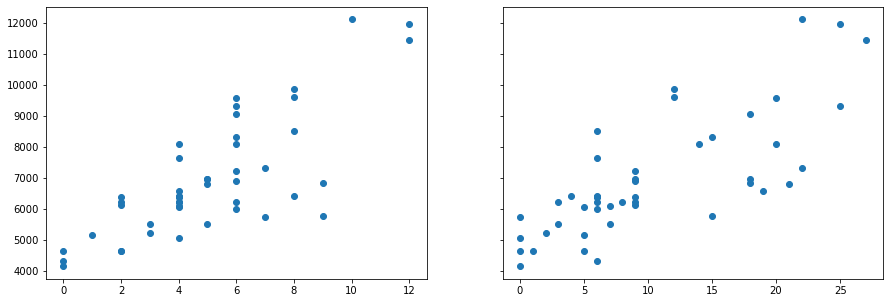

In [4]:
fig, ((ax1,ax2)) = plt.subplots(1,2,sharey=True,figsize=(15,5))
ax1.scatter(df['Anos_Educ_Superior'],df['Salario']);
ax2.scatter(df['Tempo_Empresa'],df['Salario']);

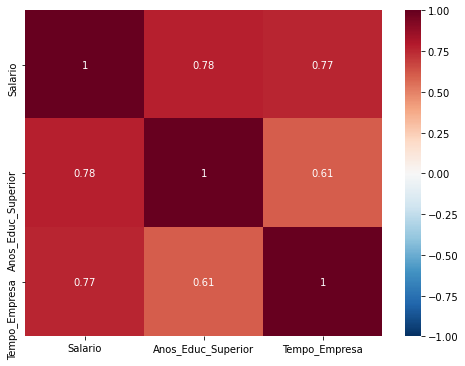

In [5]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

### Ajuste do Modelo de Regressão usando o Statsmodels (Pacote de Modelos Estatísticos)

In [6]:
# Variável resposta
y = df['Salario']

# Variáveis explicativas
df['intercepto'] = 1 
x = df[['intercepto',
        'Anos_Educ_Superior',
        'Tempo_Empresa']]

In [7]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()

In [8]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.66e-13
Time:                        09:51:22   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309

### Equação do modelo

Salário = $\beta_0$ + $\beta_1$ x Anos Educação Superior + $\beta_2$ x Tempo Empresa

### Interpretação do Modelo

**Intercepto ou $\beta_0$**: Salário médio de um colaborador sem educação superior e recém chegado na empresa é de `R$4.056,06`.<br>
**$\beta_1$** x Anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa constante, gera um aumento médio de `R$335,39`.<br>
**$\beta_2$** x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior constante, gera um aumento médio de `R$117,66`.

### Diagnóstico do Modelo: Análise dos Resíduos

In [9]:
def grafico_residuos(resultado):
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())
    
    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1
    
    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1
    
    resid_graf.set(ylim=(ymin, ymax))
    
    ax1 = resid_graf.axes
    ax1.axhline( 0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    plt.show()

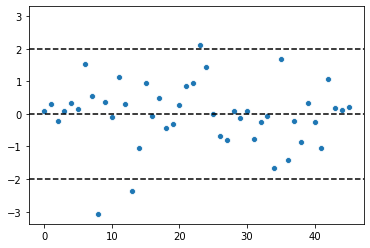

In [10]:
grafico_residuos(resultado)

#### Normalidade dos Resíduos

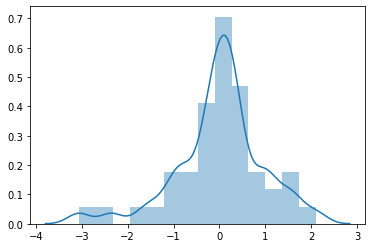

In [11]:
# Construção de histograma para avaliar a distribuição dos resíduos
sns.distplot(resultado.resid_pearson);

In [12]:
# Realização de Teste de Hipóteses para avaliar Normalidade
from scipy.stats import shapiro
normalidade = shapiro(resultado.resid_pearson)
print('Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))

Estatística=0.952, p-valor=0.057



#### Homocedasticidade dos Resíduos

In [13]:
from statsmodels.stats.diagnostic import het_white
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [14]:
white_test = het_white(resultado.resid_pearson,
                       resultado.model.exog)

In [15]:
print(dict(zip(labels, white_test)))

{'LM Statistic': 14.662862054240286, 'LM-Test p-value': 0.011904321801029679, 'F-Statistic': 3.743254940414708, 'F-Test p-value': 0.007127185674386913}
